<a href="https://colab.research.google.com/github/pyratlib/pyrat/blob/main/Classify_Multiple_Videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyRAT example

This notebook has examples of using the library to perform behavior classification of multiple videos.

For more details: https://github.com/pyratlib/pyrat

In [ ]:
#@title Installing PyRAT and downloading data.
!pip install pyratlib
!pip install wget
!pip install unrar
!git clone 
!wget https://zenodo.org/record/5883277/files/PyRAT_dataset.rar?download=1
!unrar x "/content/PyRAT_dataset.rar?download=1"

import pyratlib as rat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from IPython.display import clear_output 

clear_output()

In this cell it divides a data into three, to simulate the input of three different videos for the function. It may be necessary for the inputs (len of tracking data) to be the same size.

In [ ]:
data = pd.read_csv('/content/PyRAT_dataset/t-SNE.csv')

df = data.loc[np.where(data.iloc[:,([3,6, 9, 21])].values[2:].astype(np.float).mean(axis=1) > 0.6)]

df_1 = pd.concat([df[:2],df[1000:2000]])
df_2 = pd.concat([df[:2],df[4000:5000]])
df_3 = pd.concat([df[:2],df[9000:10000]])

df_dict = {'video1':df_1,
           'video2':df_2,
           'video3':df_3}

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


 ClassifyBehaviorMultiVideos()   
 
    """
    Returns an array with the cluster by frame, an array with the embedding data in low-dimensional 
    space and the clusterization model.
    
    Parameters
    ----------
    data : dict with DataFrames
        The input tracking data concatenated.
    bodyparts_list : list
        List with name of body parts.
    dimensions : int
        Dimension of the embedded space.
    distance : int
        The linkage distance threshold above which, clusters will not be merged.
    n_jobs : int, optional
        The number of parallel jobs to run for neighbors search.
    verbose : int, optional
        Verbosity level.
    perplexity : float, optional
        The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity.
    learning_rate : float, optional
        t-SNE learning rate.

    Returns
    -------
    cluster_df : df
        Array with the cluster by frame/video.
    cluster_coord : DataFrame
        Embedding of the training data in low-dimensional space.
    fitted_model : Obj
        AgglomerativeClustering model.

    See Also
    --------
    For more information and usage examples: https://github.com/pyratlib/pyrat
    
    Notes
    -----
    This function was developed based on DLC outputs and is able to support 
    matplotlib configurations."""

In [ ]:
df_cluster, df_coord, model = rat.ClassifyBehaviorMultiVideos(df_dict,['nose','earR','earL','tailBase'])

/usr/local/lib/python3.7/dist-packages/pyratlib/processing.py:2420: RuntimeWarning: invalid value encountered in true_divide
  distances2[:, i, j] = distances2[:, i, j]/np.max(distances2[:, i, j])
/usr/local/lib/python3.7/dist-packages/pyratlib/processing.py:2420: RuntimeWarning: invalid value encountered in true_divide
  distances2[:, i, j] = distances2[:, i, j]/np.max(distances2[:, i, j])
/usr/local/lib/python3.7/dist-packages/pyratlib/processing.py:2420: RuntimeWarning: invalid value encountered in true_divide
  distances2[:, i, j] = distances2[:, i, j]/np.max(distances2[:, i, j])
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
df_cluster.head()

,video1,video2,video3
0,7,2,6
1,7,2,6
2,7,2,6
3,7,2,6
4,7,2,6


The 'x_n_samples' and 'y_n_components' are used to plot the cluster map. In this example the first 1000 points are related with the first video, and so on. Eg. df[video1] and df_coord[x_n_samples,y_n_components][:1000]

In [ ]:
df_coord.head()

,x_n_samples,y_n_components,distance 0,distance 1,distance 2,distance 3,distance 4,distance 5
0,-66.299683,52.479321,-0.047177,0.412736,1.212293,0.797300,1.079219,1.855424
1,-65.348999,37.693684,0.245817,0.605316,1.382588,-0.014644,1.041899,1.507575
2,-67.978958,32.087402,0.179977,0.412674,1.279935,-0.256444,0.974472,1.478357
3,-65.087402,38.683369,0.279246,0.624299,1.367674,0.344457,1.006244,1.576601
4,-64.499260,39.281059,0.513897,0.680227,1.414679,0.277720,0.912235,1.633468


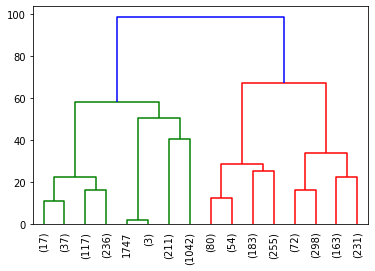

In [ ]:
rat.dendrogram(model)